In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv("C:\\Users\\tanaya\\OneDrive\\Desktop\\TCR Project\\Phishing_Legitimate_full.csv")
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


# EDA

In [3]:
df.shape

(10000, 50)

In [4]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [5]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [6]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [7]:
#finding null values in the dataset
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [8]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<AxesSubplot: xlabel='CLASS_LABEL', ylabel='count'>

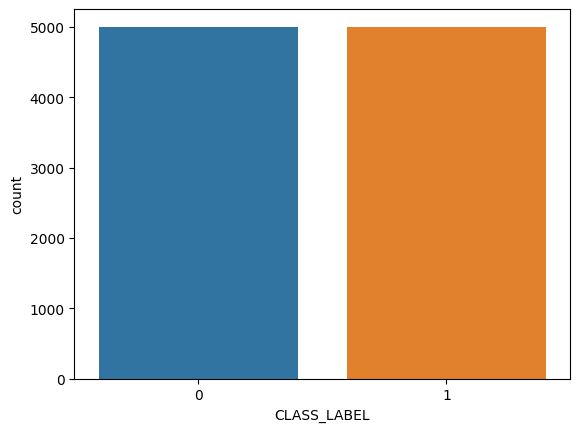

In [10]:
#count plot for class label
sns.countplot(x='CLASS_LABEL',data=df)

In [11]:
df.corr()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,...,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.009916,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,-0.084148,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.024811,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869


In [12]:
def heatmap(df,start_index,end_index):
    new_df=pd.DataFrame(df.iloc[:,start_index:end_index])
    plt.figure(figsize=(10,8))
    sns.heatmap(new_df.corr(),annot=True,cmap="Blues",fmt='.2f')

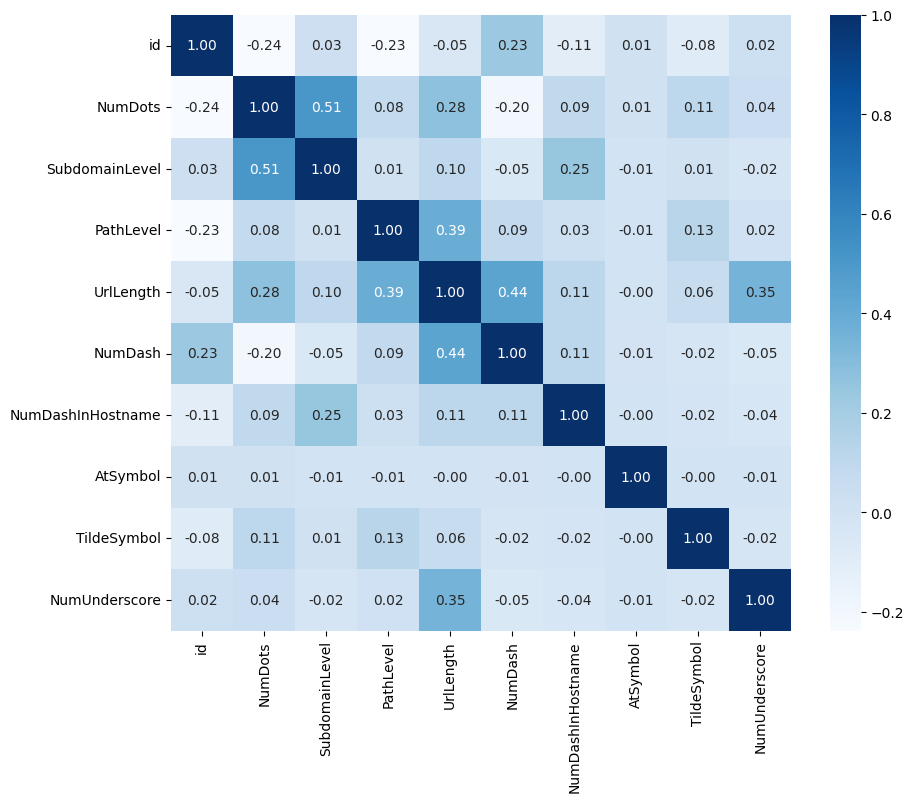

In [13]:
#Heatmap for first 10 columns
heatmap(df,0,10)

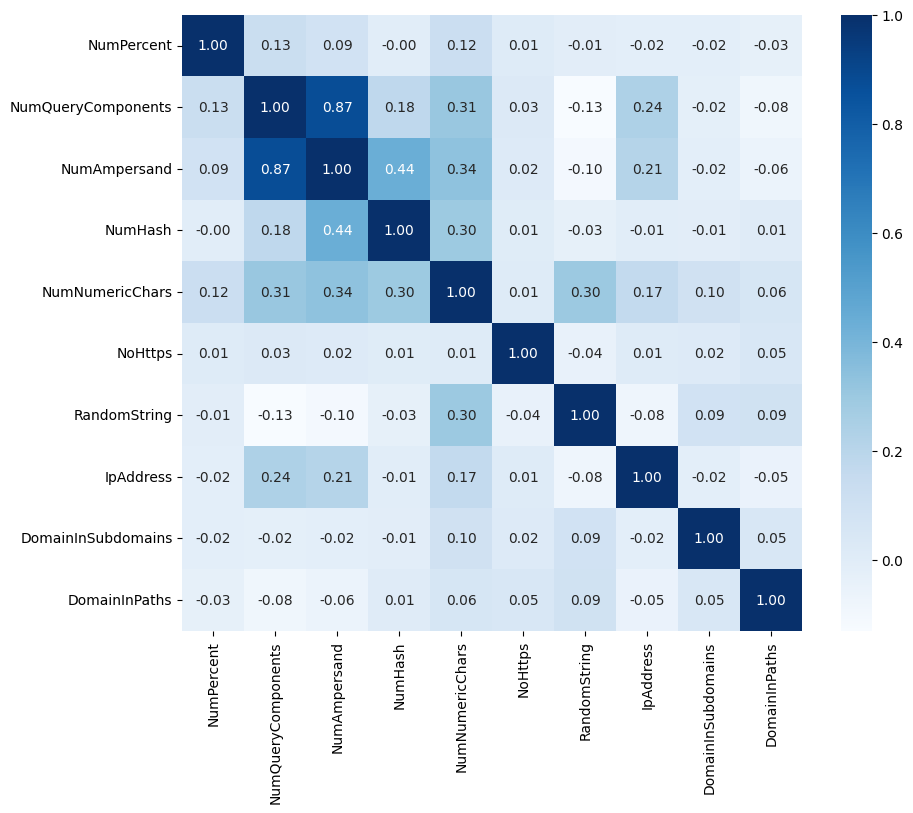

In [14]:
heatmap(df,10,20)

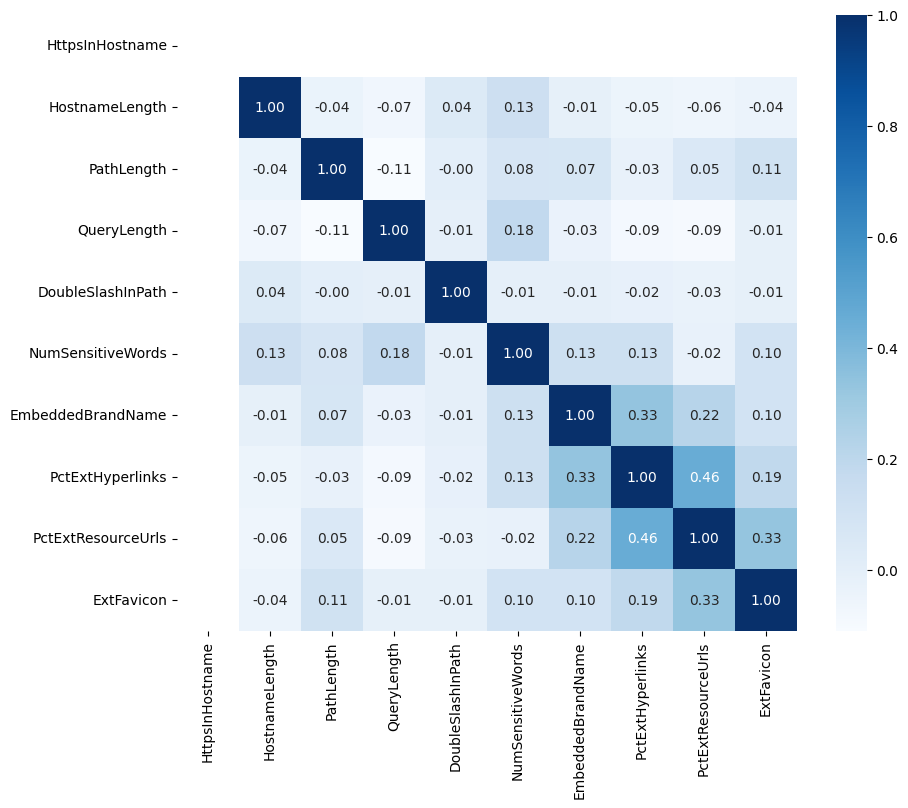

In [15]:
heatmap(df,20,30)

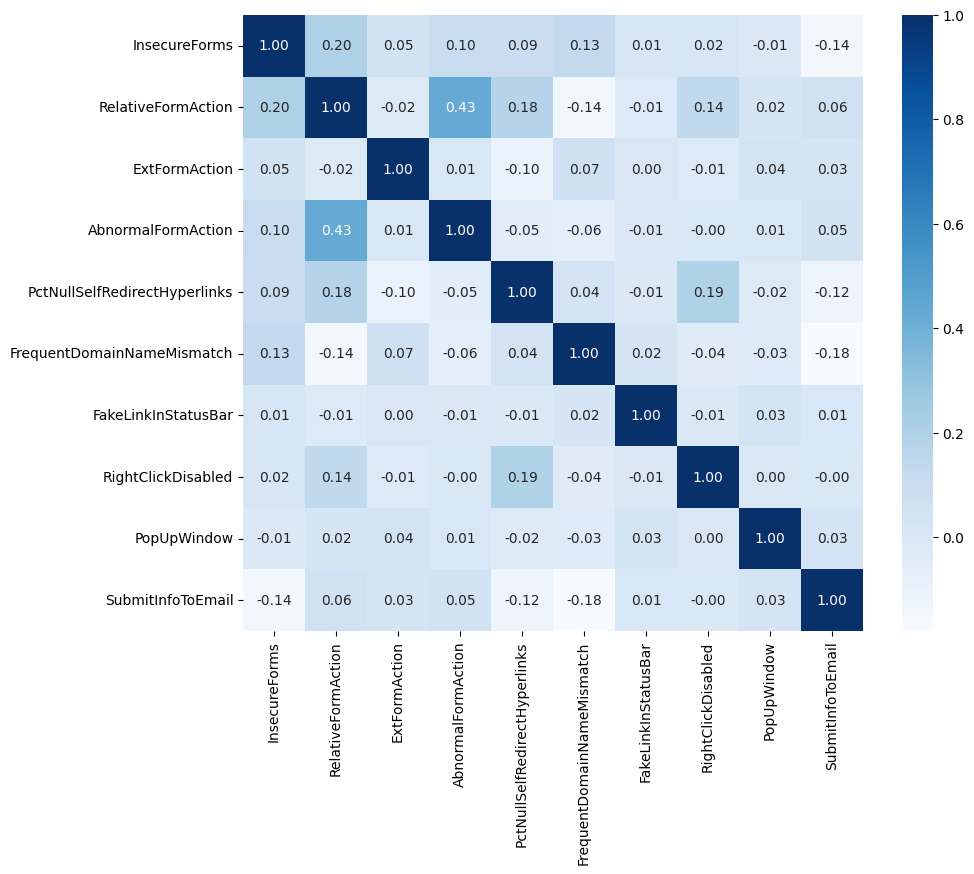

In [16]:
heatmap(df,30,40)

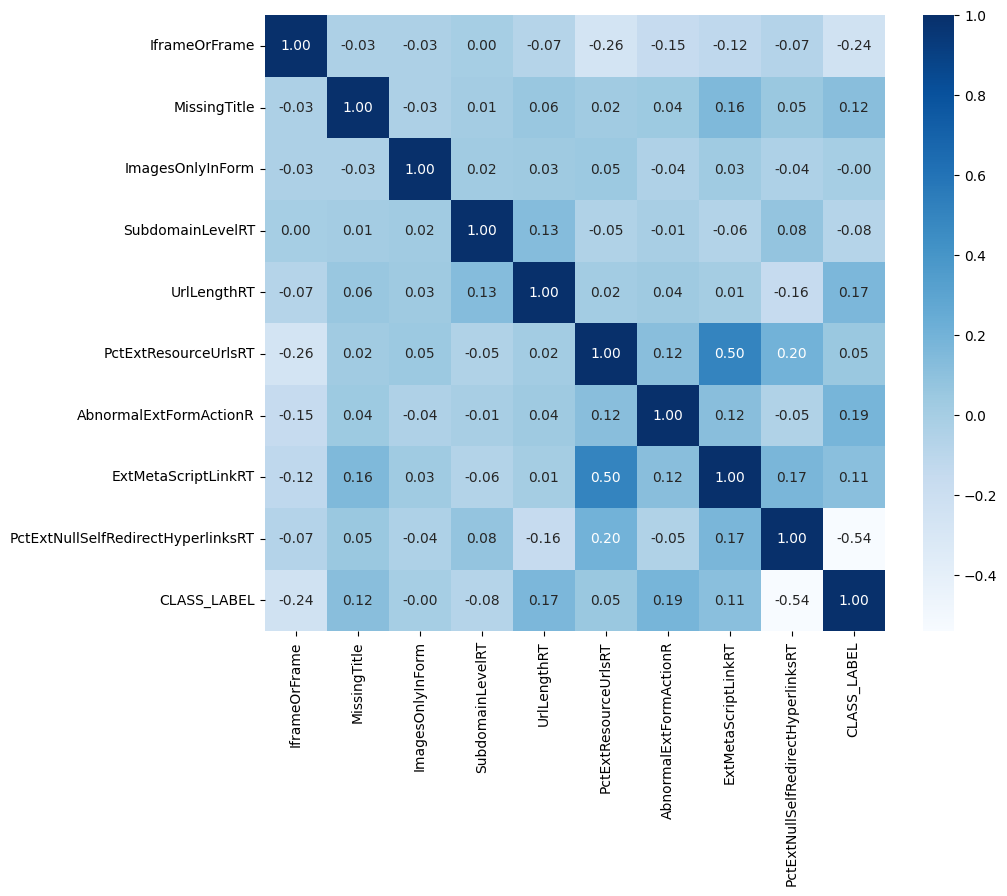

In [17]:
heatmap(df,40,50)

# Splitting data into training and testing dataset

Dividing the dataset into training and testing dataset such that Training Data=80% and Testing Data=20%

In [18]:
x=df.drop(columns=['id','CLASS_LABEL'],axis=1)
y=df['CLASS_LABEL']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9254,2,1,2,41,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
1561,3,1,3,40,0,0,0,0,0,1,...,0,0,0,0,1,1,-1,1,-1,1
1670,3,0,4,53,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,-1
6087,3,1,2,89,12,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,1
6669,1,0,4,101,6,0,0,0,3,0,...,0,0,0,0,1,-1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,0,1,60,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
5191,3,1,2,116,1,0,0,0,2,1,...,0,0,0,0,1,-1,1,1,1,1
5390,1,0,5,60,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
860,2,0,3,50,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,-1,1


In [21]:
x_test

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
6252,1,0,3,60,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4684,3,1,5,75,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,-1
1731,1,0,3,64,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
4742,3,0,4,71,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,-1,1
4521,3,1,2,52,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,3,1,1,99,7,0,0,0,2,0,...,0,1,0,0,1,-1,-1,0,-1,1
8285,2,0,2,59,0,0,0,0,3,0,...,1,0,0,0,1,0,1,1,1,1
7853,1,0,1,67,4,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
1095,1,0,4,79,1,0,0,0,0,0,...,0,0,0,0,1,-1,1,1,1,1


In [22]:
y_train

9254    0
1561    1
1670    1
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: CLASS_LABEL, Length: 8000, dtype: int64

In [23]:
y_test

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: CLASS_LABEL, Length: 2000, dtype: int64

# Random forest classification

In [24]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
#model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
y_pred1=classifier.predict(x_test)
y_pred1_train=classifier.predict(x_train)

In [27]:
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,recall_score,precision_score,accuracy_score

In [28]:
confusion_matrix(y_test,y_pred1)

array([[973,  15],
       [ 18, 994]], dtype=int64)

In [29]:
print("Recall is",recall_score(y_test,y_pred1))

Recall is 0.9822134387351779


In [30]:
print("Precision is",precision_score(y_test,y_pred1))

Precision is 0.9851337958374629


In [31]:
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred1))

Mean Absolute Error : 0.0165


In [32]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred1))

Mean Squared Error : 0.0165


In [33]:
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred1,squared=False))

Root Mean Squared Error : 0.1284523257866513


In [34]:
print("Accuracy :",accuracy_score(y_test,y_pred1))

Accuracy : 0.9835


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.99      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [37]:
#Accuracy for training data
accuracy_score(y_train,y_pred1_train)

1.0

In [38]:
confusion_matrix(y_train,y_pred1_train)

array([[4012,    0],
       [   0, 3988]], dtype=int64)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred2=clf.predict(x_test)
y_pred2_train=clf.predict(x_train)

In [41]:
confusion_matrix(y_test,y_pred2)

array([[918,  70],
       [ 53, 959]], dtype=int64)

In [42]:
print("Recall is",recall_score(y_test,y_pred2))

Recall is 0.9476284584980237


In [43]:
print("Precision is",precision_score(y_test,y_pred2))

Precision is 0.9319727891156463


In [44]:
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred2))

Mean Absolute Error : 0.0615


In [45]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred2))

Mean Squared Error : 0.0615


In [46]:
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred2,squared=False))

Root Mean Squared Error : 0.24799193535274489


In [47]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [48]:
accuracy_score(y_test,y_pred2)

0.9385

In [49]:
accuracy_score(y_train,y_pred2_train)

0.947375

In [50]:
confusion_matrix(y_train,y_pred2_train)

array([[3771,  241],
       [ 180, 3808]], dtype=int64)